<h1>K-Means</h1>

<h2>Data challenge</h2>
<a>https://challengedata.ens.fr/participants/challenges/15/</a>

In [20]:
import pandas as pd

In [21]:
df_raw_train_input = pd.read_csv('./KNN/train_input_2yaM34J.csv')

In [22]:
df_raw_train_input.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright
0,0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0
1,1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0
2,2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0
3,3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0
4,4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0


In [23]:
df_raw_test_input = pd.read_csv('./KNN/test_input_8Vm9H5A.csv')

In [24]:
df_raw_test_input.head()

,ID,Date,Temperature,Humidity,Humex,CO2,Bright
0,8000,2018-02-18 20:00:00,20.1,26.0,17.9,377.0,1.0
1,8001,2018-02-18 20:30:00,20.2,26.0,18.0,374.0,1.0
2,8002,2018-02-18 21:00:00,20.1,26.0,17.9,379.0,1.0
3,8003,2018-02-18 21:30:00,20.1,26.0,17.9,380.0,1.0
4,8004,2018-02-18 22:00:00,20.0,26.0,17.8,379.0,1.0


In [25]:
df_raw_train_output = pd.read_csv('./KNN/train_output_2kCtjpF.csv')

<h3>Feature scaling</h3>

In [26]:
def min_max_std(val:float, val_max:float, val_min:float)-> float:
    return (val - val_min) / (val_max - val_min)

In [27]:
vr_min = df_raw_train_input["Temperature"].min()
vr_max = df_raw_train_input["Temperature"].max()

df_train_input_std = df_raw_train_input.copy()
df_train_input_std["Temperature"] = df_train_input_std["Temperature"].map(lambda a: min_max_std(a,vr_max,vr_min))

vr_min = df_raw_train_input["Humidity"].min()
vr_max = df_raw_train_input["Humidity"].max()
df_train_input_std["Humidity"] = df_train_input_std["Humidity"].map(lambda a: min_max_std(a,vr_max,vr_min))

vr_min = df_raw_train_input["Humex"].min()
vr_max = df_raw_train_input["Humex"].max()
df_train_input_std["Humex"] = df_train_input_std["Humex"].map(lambda a: min_max_std(a,vr_max,vr_min))

vr_min = df_raw_train_input["CO2"].min()
vr_max = df_raw_train_input["CO2"].max()
df_train_input_std["CO2"] = df_train_input_std["CO2"].map(lambda a: min_max_std(a,vr_max,vr_min))

vr_min = df_raw_train_input["Bright"].min()
vr_max = df_raw_train_input["Bright"].max()
df_train_input_std["Bright"] = df_train_input_std["Bright"].map(lambda a: min_max_std(a,vr_max,vr_min))

<p>Then I found about StandardScaler</p>

In [28]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

<h3>Basic Metrics</h3>

In [29]:
df_train_input_std[["Temperature","Humidity","Humex","CO2","Bright"]].describe()

,Temperature,Humidity,Humex,CO2,Bright
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,0.485130,0.423589,0.431853,0.124776,0.046080
std,0.156064,0.196216,0.155361,0.112143,0.087237
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403846,0.261905,0.337349,0.050360,0.000000
50%,0.509615,0.404762,0.439759,0.073049,0.000000
75%,0.596154,0.595238,0.530120,0.183868,0.064699
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X = df_train_input_std[["Temperature","Humidity","Humex","CO2","Bright"]].values

<h3>Get Optimal K</h3>

In [63]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

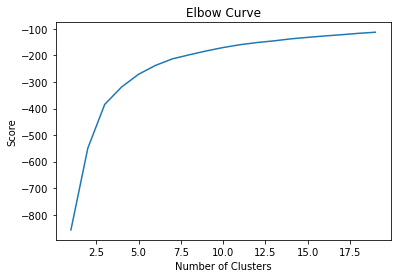

In [64]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [67]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.53375587 0.24600425 0.39840958 0.08882209 0.01529818]
 [0.42993793 0.60344449 0.45307455 0.06584416 0.02137014]
 [0.58759077 0.33100609 0.4759791  0.30435663 0.12863221]
 [0.63056894 0.64912369 0.64918223 0.17090702 0.08798539]
 [0.22665862 0.34013097 0.19176257 0.05359328 0.01288368]]


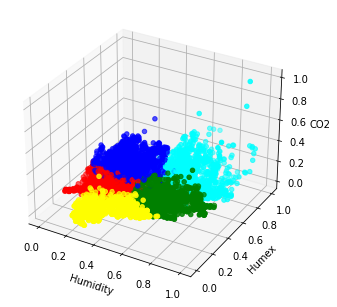

In [68]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
#Humidity, Humex & CO2
ax.scatter(X[:, 1], X[:, 2], X[:, 3], c=asignar)
ax.scatter(C[:, 1], C[:, 2], C[:, 3], marker='*', c=colores)
ax.set_xlabel('Humidity')
ax.set_ylabel('Humex')
ax.set_zlabel('CO2')
plt.show()

<h3>New Data</h3>

In [69]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [55]:
X_test = min_max_scaler.fit_transform(df_raw_test_input[["Temperature","Humidity","Humex","CO2","Bright"]])

In [57]:
new_labels = kmeans.predict(X_test)
print(new_labels)

[3 3 3 ... 3 3 3]
